In [1]:
import numpy as np
from sklearn import neighbors 
from sklearn.metrics import mean_squared_error
#from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import neighbors 
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from numpy import genfromtxt
import pandas as pd
from sklearn.preprocessing import LabelEncoder 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor 
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
import math

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from time import process_time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV



In [2]:
df = pd.read_csv('cleaned.csv').drop(['Unnamed: 0'],axis=1)
df=df.dropna()
df

,price,Address,bedroom,bathroom,size_sqf,types,city,province,Latitude,Longitude
0,1425,Poplar,1,1,533,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
1,2245,Poplar,2,2,910,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
2,1350,Abbotsford West,1,1,538,Apt/Condo,Abbotsford,BC,49.039034,-122.430243
3,1725,Poplar,1,1,689,Apt/Condo,Abbotsford,BC,49.075942,-122.247779
4,1625,Central Abbotsford,2,1,846,Apt/Condo,Abbotsford,BC,49.050438,-122.304470
...,...,...,...,...,...,...,...,...,...,...
3234,1535,Av. Lennox,1,1,700,House,Montreal,Quebec,45.512978,-73.624023
3235,6999,Rue Sherbrooke O.,2,2,1175,House,Montreal,Quebec,45.481598,-73.600424
3236,1437,Av. Somerled,2,1,770,House,Montreal,Quebec,45.467881,-73.638234
3237,3500,Tsse St-Denis,3,2,1800,House,Montreal,Quebec,45.516377,-73.566669


In [3]:
df1=df.drop(columns=['Address','province','Latitude','Longitude'])# I only control for city. 
df1['bedroom']=df1['bedroom'].astype("category") #
#df1['size_sqf_q2']=df1['size_sqf']*df1['size_sqf'] #I added bigger places additional square feet has smaller impact on price than small places. 


In [4]:
df_dummies = pd.get_dummies(data=df1)

In [5]:
training_data, testing_data = train_test_split(df_dummies, test_size=0.2, random_state=25)


In [6]:
y_train=training_data['price']
X_train=training_data.drop(columns=['price'])
y_test=testing_data['price']
X_test=testing_data.drop(columns=['price'])

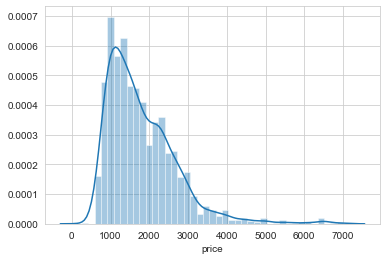

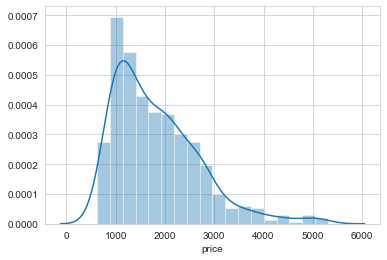

In [7]:
sns.set_style('whitegrid')
sns.distplot(y_train)
plt.show()
sns.distplot(y_test)
plt.show()


As we can see our train and test dataset have similar distribution. 

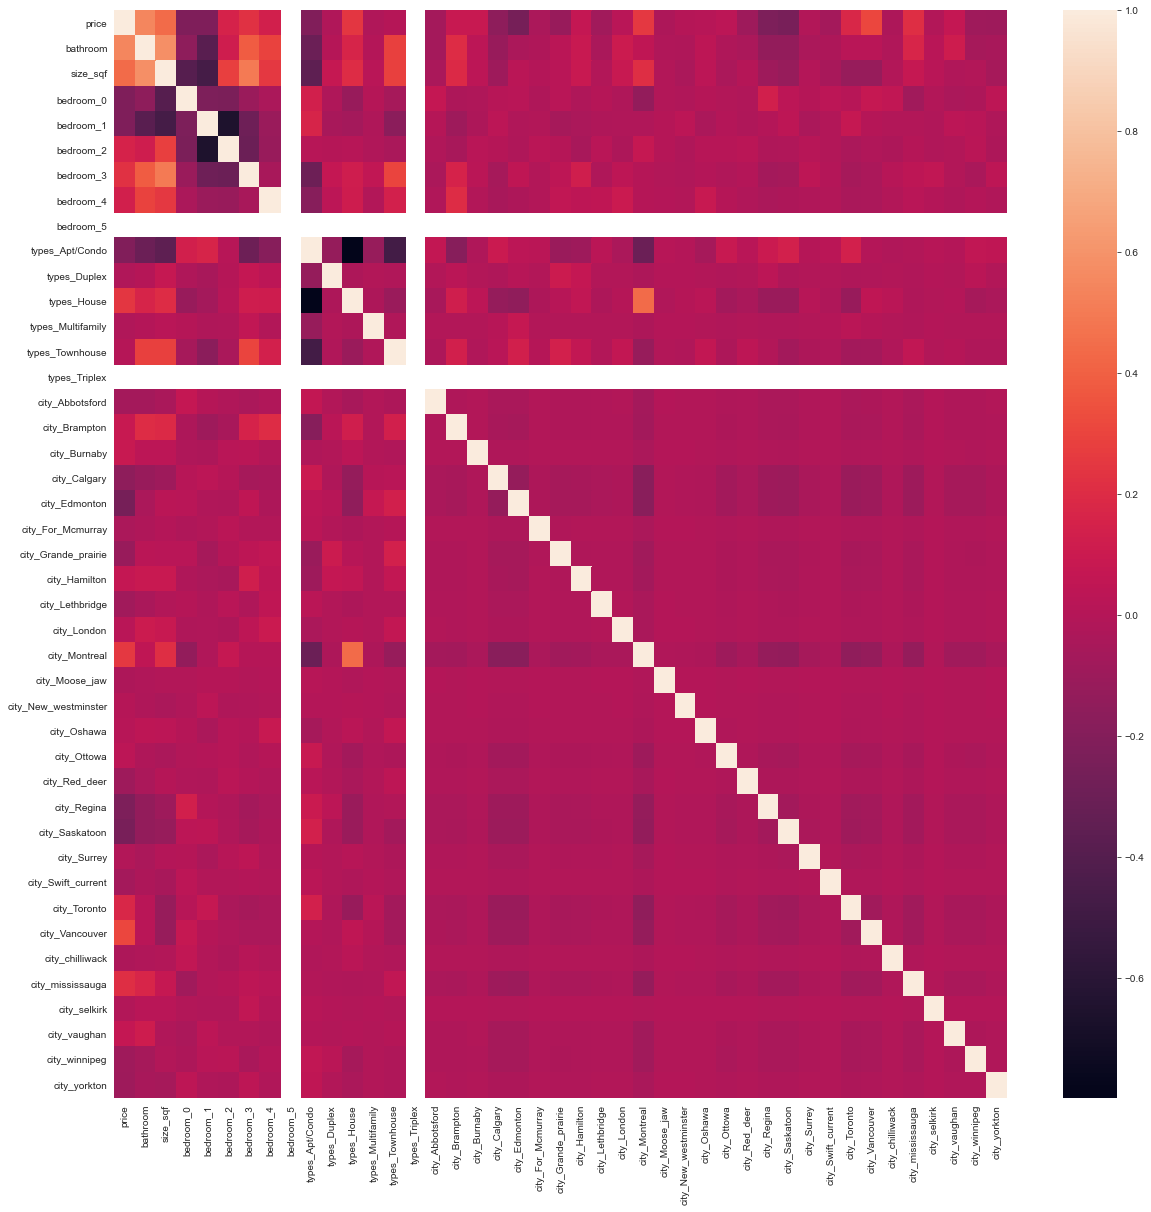

In [8]:
plt.figure(figsize=(20,20))
sns.heatmap(training_data.corr())


As we can see in the above graph, a lot of vairables in our model are correlated with each other. This may suggest that the linear regression is not a wise choice.

# Regresion (OLS)

In [9]:
model_ols = sm.OLS(y_train,X_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     139.7
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:34:27   Log-Likelihood:                -19853.
No. Observations:                2591   AIC:                         3.978e+04
Df Residuals:                    2553   BIC:                         4.001e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathroom               466.7175     24.890     18.751      0.000     417.911     515.524
size_sqf                 0.7366      0.064     11.482      0.000       0.611       0.862
bedroom_0               37.8428     45.805      0.826      0.409     -51.976     127.661
bedroom_1              134.3697     34.700      3.872      0.000      66.328     202.412
bedroom_2              209.2434     41.392      5.055      0.000     128.079     290.408
bedroom_3              219.5747     56.368      3.895      0.000     109.042     330.107
bedroom_4              180.2178     92.137      1.956      0.051      -0.454     360.889
bedroom_5             1.611e-12   6.43e-12      0.250      0.802    -1.1e-11    1.42e-11
types_Apt/Condo        268.9259     40.836      6.585      0.000     188.851     349.001
types_Duplex           201.9929    145.653      1.387      0.166     -83.617     487.603
types_House            243.2067     47.711      5.097      0.000     149.650     336.764
types_Multifamily       91.5273    151.056      0.606      0.545    -204.678     387.733
types_Townhouse        -24.4045     58.121     -0.420      0.675    -138.374      89.565
types_Triplex          5.03e-14   2.01e-13      0.250      0.803   -3.44e-13    4.45e-13
city_Abbotsford        -52.4266     84.670     -0.619      0.536    -218.456     113.603
city_Brampton           91.0525     76.010      1.198      0.231     -57.995     240.100
city_Burnaby           999.9312    147.918      6.760      0.000     709.880    1289.983
city_Calgary           -70.0631     40.750     -1.719      0.086    -149.969       9.843
city_Edmonton         -411.8993     40.762    -10.105      0.000    -491.829    -331.969
city_For_Mcmurray     -241.5181    142.009     -1.701      0.089    -519.982      36.946
city_Grande_prairie   -479.1668     69.128     -6.932      0.000    -614.720    -343.614
city_Hamilton          318.0777     73.480      4.329      0.000     173.991     462.164
city_Lethbridge       -393.5283    108.435     -3.629      0.000    -606.158    -180.899
city_London            -93.7680    126.449     -0.742      0.458    -341.720     154.184
city_Montreal          512.0668     39.422     12.989      0.000     434.764     589.370
city_Moose_jaw        -644.9229    355.596     -1.814      0.070   -1342.209      52.363
city_New_westminster   596.0141    226.116      2.636      0.008     152.624    1039.404
city_Oshawa            183.6922    161.912      1.135      0.257    -133.800     501.185
city_Ottowa            386.9128     58.679      6.594      0.000     271.849     501.977
city_Red_deer         -497.5499    100.745     -4.939      0.000    -695.100    -300.000
city_Regina           -374.7255     49.112     -7.630      0.000    -471.029    -278.422
city_Saskatoon        -405.0192     46.801     -8.654    

<ipython-input-10-2f03f4f782cf>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(coef_df.shape[0]),


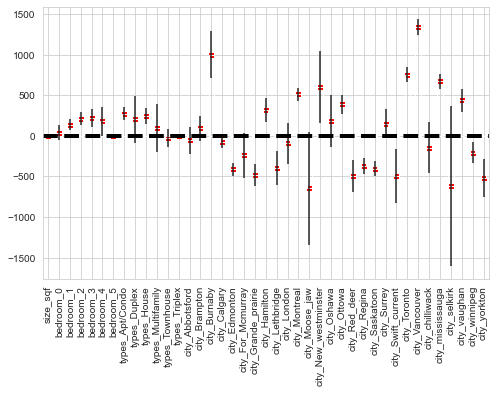

In [10]:
err_series = model_ols.params - model_ols.conf_int()[0] ##calculating error bar length
coef_df = pd.DataFrame({'coef': model_ols.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=10, 
           y=coef_df['coef'], color='red')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')


The above graph shows the impact of different independent variables on the rental price. as we can see, Vancouver is the most expensive city for rentals in Canada. On average, rentals located in Vancouver are $1303 more expensive than rentals in Abbotsford. Furthermore, rentals located in Toronto are cheaper than Vancouver but more expensive than Abbotsford

In [14]:
mse={}
y_hat=model_ols.predict(X_test)
sqr=mean_squared_error(y_test, y_hat)
ols_mse=np.sqrt(sqr).round(2)
mse['OLS']=ols_mse
mse

{'OLS': 448.03}

# OLS with log transformation

The histogram of y_train and y_test suggest that price is skewed to the right. Therefore, log transformation of the price might result in a better model

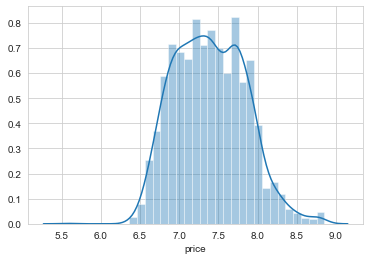

In [15]:
y_train_log=np.log1p(y_train)
sns.set_style('whitegrid')
sns.distplot(y_train_log)
plt.show()


The new plot for price is not skewed to right anymore. 

In [16]:
model_ols_log = sm.OLS(y_train_log,X_train).fit()
model_ols_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     266.2
Date:                Wed, 23 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:36:58   Log-Likelihood:                 434.35
No. Observations:                2591   AIC:                            -792.7
Df Residuals:                    2553   BIC:                            -570.0
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
bathroom                 0.1736      0.010     17.543      0.000       0.154       0.193
size_sqf                 0.0004   2.55e-05     14.350      0.000       0.000       0.000
bedroom_0                2.9457      0.018    161.751      0.000       2.910       2.981
bedroom_1                3.0795      0.014    223.221      0.000       3.052       3.107
bedroom_2                3.1337      0.016    190.419      0.000       3.101       3.166
bedroom_3                3.1532      0.022    140.696      0.000       3.109       3.197
bedroom_4                3.1552      0.037     86.131      0.000       3.083       3.227
bedroom_5            -9.519e-15   2.56e-15     -3.722      0.000   -1.45e-14    -4.5e-15
types_Apt/Condo          3.1350      0.016    193.089      0.000       3.103       3.167
types_Duplex             3.1588      0.058     54.548      0.000       3.045       3.272
types_House              3.1210      0.019    164.529      0.000       3.084       3.158
types_Multifamily        3.0113      0.060     50.141      0.000       2.894       3.129
types_Townhouse          3.0411      0.023    131.603      0.000       2.996       3.086
types_Triplex        -1.908e-15      8e-17    -23.862      0.000   -2.07e-15   -1.75e-15
city_Abbotsford          0.5533      0.034     16.436      0.000       0.487       0.619
city_Brampton            0.6743      0.030     22.311      0.000       0.615       0.734
city_Burnaby             1.0183      0.059     17.315      0.000       0.903       1.134
city_Calgary             0.5136      0.016     31.702      0.000       0.482       0.545
city_Edmonton            0.2955      0.016     18.232      0.000       0.264       0.327
city_For_Mcmurray        0.4278      0.056      7.576      0.000       0.317       0.538
city_Grande_prairie      0.2448      0.027      8.908      0.000       0.191       0.299
city_Hamilton            0.7804      0.029     26.711      0.000       0.723       0.838
city_Lethbridge          0.2673      0.043      6.200      0.000       0.183       0.352
city_London              0.5936      0.050     11.807      0.000       0.495       0.692
city_Montreal            0.8377      0.016     53.449      0.000       0.807       0.868
city_Moose_jaw          -0.0178      0.141     -0.126      0.900      -0.295       0.259
city_New_westminster     0.9070      0.090     10.089      0.000       0.731       1.083
city_Oshawa              0.7165      0.064     11.131      0.000       0.590       0.843
city_Ottowa              0.8025      0.023     34.398      0.000       0.757       0.848
city_Red_deer            0.1965      0.040      4.906      0.000       0.118       0.275
city_Regina              0.2632      0.020     13.479      0.000       0.225       0.301
city_Saskatoon           0.2357      0.019     12.665    

The result suggests that the current model has larger R squared 

In [31]:
y_hat=model_ols_log.predict(X_test)
y_hat_1=np.exp(y_hat)-1
sqr=mean_squared_error(y_test, y_hat_1)
ols_mse_log=np.sqrt(sqr).round(2)
mse['OLS with log']=ols_mse_log

# Decision tree

In [19]:
model=tree.DecisionTreeRegressor(random_state = 0)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [20]:
clf = DecisionTreeRegressor(random_state=0)
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
test=[]
nodes=[]
for val in ccp_alphas:
        model=DecisionTreeRegressor(random_state = 0,ccp_alpha= val)
        score = cross_val_score(model,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=5)
        test.append((val, score.mean()))
        model.fit(X_train,y_train)
        nodes.append((val,model.tree_.node_count))

In [22]:
df1 = pd.DataFrame(test, 
             columns=['alpha', 
                      'mse'])
df2 = pd.DataFrame(nodes, 
             columns=['alpha', 
                      'nodes'])
df2['mse']= -df1['mse']

Text(0.5, 1.0, 'The relationship between the number of nodes and MSE')

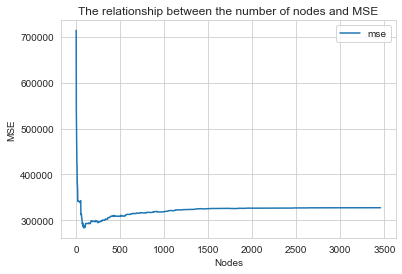

In [23]:
df2.plot(x ='nodes', y='mse', kind = 'line')
plt.ylabel('MSE')
plt.xlabel('Nodes')
plt.title('The relationship between the number of nodes and MSE')



In [24]:
df2.loc[df2['mse'] ==df2['mse'].min(), 'nodes'] ## the result says that the number of nodes for having minimum mse is 29

1259    89
Name: nodes, dtype: int64

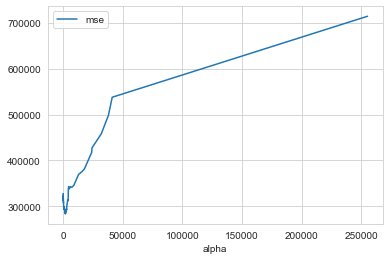

In [25]:
df2.plot(x ='alpha', y='mse', kind = 'line')

In [26]:
alpha_model=df2.loc[df2['mse'] ==df2['mse'].min(), 'alpha'] ## finding the min mse for alpha
alpha_model

1259    1856.685824
Name: alpha, dtype: float64

In [27]:
model_cross=tree.DecisionTreeRegressor(random_state = 0, ccp_alpha=11647.355982)

In [28]:
model_cross.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=11647.355982, random_state=0)

In [32]:
y_hat=model_cross.predict(X_test)
mean_squared_error(y_test, y_hat)
mse_Decision_tree=np.sqrt(sqr).round(2)
mse['Decision Tree']=mse_Decision_tree
mse

{'OLS': 448.03, 'OLS with log': 453.71, 'Decision Tree': 453.71}

   # Random forest

In [33]:
# Set paramters for Grid Search
param_grid =  {'n_estimators':[200, 300, 400, 500, 600],
               'max_features':[0.1, 0.3, 0.6]
              }

In [34]:
# Initialise the random forest model 
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True)

# Initialise Gridsearch CV with 5 fold corssvalidation and neggative root_mean_squared_error
Tuned_RandForest = GridSearchCV(estimator=RandForest, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)


In [35]:
Tuned_RandForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid={'max_features': [0.1, 0.3, 0.6],
                         'n_estimators': [200, 300, 400, 500, 600]},
             scoring='neg_root_mean_squared_error')

Random Forest Regressor


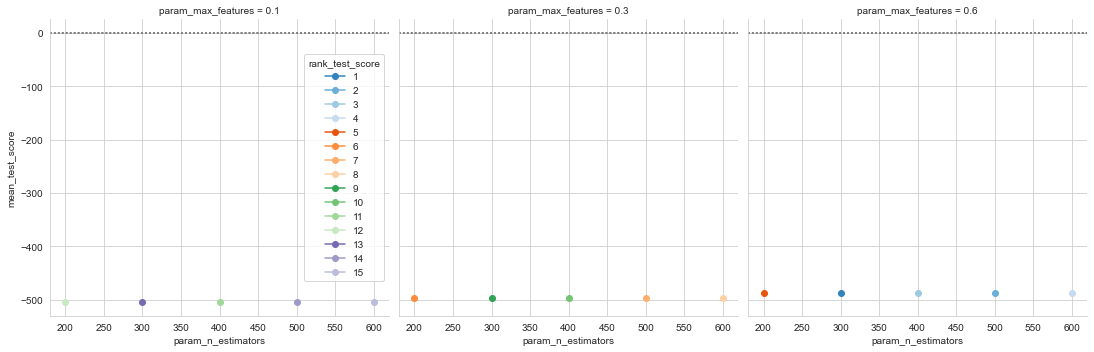

In [36]:
Results = pd.DataFrame(Tuned_RandForest.cv_results_)
Results_Best = Results.loc[Results.rank_test_score==1]
    
print('Random Forest Regressor')
#Results = Results.loc[Results.rank_test_score==1]

# Create a plot to show all models 

col = ['param_max_features']

for col in col:
    grid = sns.FacetGrid(Results, col=col, hue='rank_test_score', palette="tab20c", legend_out=False,
                         col_wrap=5, height=5)

    # Draw a horizontal line to show the starting point
    grid.map(plt.axhline, y=0, ls=":", c=".5")

    # Draw marker on plot and decide what parameters to plot
    grid.map(plt.plot, "param_n_estimators", "mean_test_score", marker="o")

    # Adjust the arrangement of the plots
    grid.fig.tight_layout(w_pad=1)
    
    # Add legend to gird 
    grid.add_legend()


The above graph shows the results of all models. As it is is obvious best result best on rank test scre is param_n_estimators==600 and param_max_features=0.6

Calculating random forest performance based on the test dataset.

In [37]:
RandForest = RandomForestRegressor(n_jobs= -1, random_state = 0, bootstrap=True,n_estimators=600,max_features=0.6)

In [38]:
RandForest.fit(X_train, y_train)

RandomForestRegressor(max_features=0.6, n_estimators=600, n_jobs=-1,
                      random_state=0)

In [41]:
y_hat=RandForest.predict(X_test)
mm=mean_squared_error(y_test, y_hat)
mse_random_forest=np.sqrt(mm).round(2)
mse['Random Forest']=mse_random_forest
mse

{'OLS': 448.03,
 'OLS with log': 453.71,
 'Decision Tree': 453.71,
 'Random Forest': 450.49}

# ridge regression

In [43]:
# finding the best alpha
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

(100, 42)

Text(0, 0.5, 'weights')

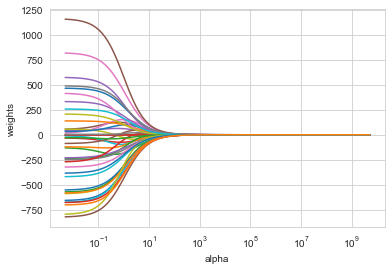

In [44]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [45]:
regr_cv = RidgeCV(alphas=alphas)

In [46]:
reg_model=regr_cv.fit(X_train, y_train)

In [50]:
y_hat=reg_model.predict(X_test)
sqr=mean_squared_error(y_test, y_hat)
mse_ridge=np.sqrt(sqr).round(2)
mse['Ridge']=mse_ridge
mse

{'OLS': 448.03,
 'OLS with log': 453.71,
 'Decision Tree': 453.71,
 'Random Forest': 450.49,
 'ridge': 447.3622311324708,
 'Ridge': 447.36,
 'Lasso': 448.05404138661686}

# lasso model

In [52]:
#First you have to define all the possible alphas then create GridSearchCV. And finally create the data
alphas = 10**np.linspace(10,-2,100)*0.5 #selecting a large alpha
param_grid={'alpha':alphas}
Lasso = linear_model.Lasso(random_state=42,normalize=True, tol=1e-2)
Tuned_RandForest = GridSearchCV(estimator=Lasso, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
Tuned_RandForest.fit(X_train,y_train)
y_hat=Tuned_RandForest.predict(X_test)
sqr=mean_squared_error(y_test, y_hat)
mse_lasso=np.sqrt(sqr).round(2)
mse['Lasso']=mse_lasso
mse

{'OLS': 448.03,
 'OLS with log': 453.71,
 'Decision Tree': 453.71,
 'Random Forest': 450.49,
 'ridge': 447.3622311324708,
 'Ridge': 447.36,
 'Lasso': 448.05}

In [61]:
pd.DataFrame.from_dict(mse,orient='index', columns=['MSE'])


,MSE
OLS,448.030000
OLS with log,453.710000
Decision Tree,453.710000
Random Forest,450.490000
ridge,447.362231
Ridge,447.360000
Lasso,448.050000
